In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime
import os


def get_cpustealdelta_per_min(data):
    return float(data['cpuStealDelta']) / (float(data['runtime']) / 60000)

plt.style.use('seaborn-whitegrid')

In [2]:


def get_jsons_from_dir(con):
#     base_dir = '../SAAF/test/history/cache_bench_test-cb_exp_{}-0MBs-run0-1/'
#     base_dir = '../6.22/data/cache_bench_test-cb_exp_{}-0MBs-run0-1/' # 4.5 GB
    base_dir = '../7.1/data/cache_bench_test-cb_exp_{}-0MBs-run0-1/' # 2.2 GB
#     base_dir = '../7.8/data/cache_bench_test-cb_exp_1-0MBs-run0-{}/'
    cur_dir = base_dir.format(con)
    file_names = os.listdir(cur_dir)
    results = []
    for fname in file_names:
        with open(cur_dir + fname, 'r') as f:
            results.append(json.load(f))
    return results

In [3]:
raw_data = list(map(get_jsons_from_dir, range(1, 31)))
# raw_data = list(map(get_jsons_from_dir, range(0, 30)))

In [4]:
cpuSteals_avg = []
for i in range(30):
    tmp = 0
    for j in raw_data[i]:
#         tmp += float(j['cpuSteal'])
#         tmp += float(j['cpuStealDelta'])
        tmp += get_cpustealdelta_per_min(j)
    tmp = tmp / len(raw_data[i])
    cpuSteals_avg.append(tmp)

In [5]:
cpuSteals_avg

[128.6189851709876,
 95.76244941144982,
 64.51685255247787,
 92.40333968266283,
 57.85085939177236,
 66.89969433351916,
 85.35753808051975,
 68.21605627259201,
 52.73375843420868,
 48.19773566606578,
 68.68329640851105,
 71.05548692178793,
 62.35693122974765,
 57.018585851770794,
 64.4642309799399,
 76.19506536922832,
 57.731754002206216,
 61.65636103600738,
 74.96397231680994,
 77.24764461116106,
 64.96456692043962,
 52.18210310214153,
 61.175482063585854,
 60.717585301875,
 48.367210320555095,
 55.163968601801464,
 58.30721963477616,
 60.638739890030436,
 66.16856289480661,
 51.92085627729735]

In [6]:
x = list(range(1, 31))

In [7]:
plt.rcParams["figure.figsize"] = (10,8)

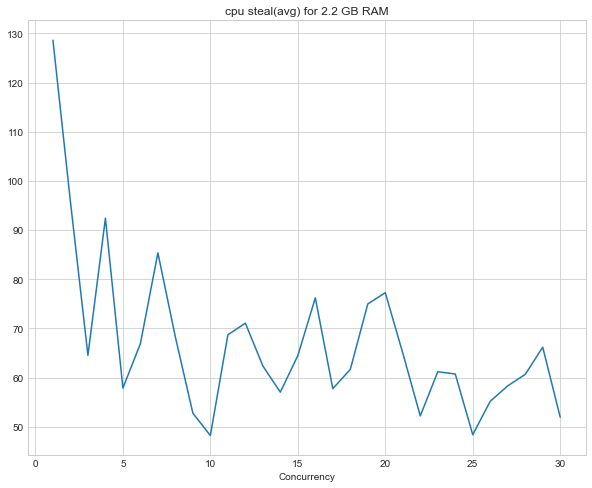

In [8]:
plt.title('cpu steal(avg) for 2.2 GB RAM')
# y = parse_raw_data(raw_data, lambda i: i[0][0])
plt.xlabel('Concurrency')
# plt.ylabel('')
plt.plot(x, cpuSteals_avg)

In [9]:
raw_data[3][0]['cache_bench_metric'].split('\\n')[51]

'[2022-07-01 00:01:51.551784] 2147483648      0.85            8973.91         0.99           '

In [10]:
two_gb_throughput_avg = []
for i in range(30):
    tmp = 0
    for j in raw_data[i]:
        tmp += float(j['cache_bench_metric'].split('\\n')[51].split()[-2])
    tmp = tmp / len(raw_data[i])
    two_gb_throughput_avg.append(tmp)

In [11]:
two_gb_throughput_avg

[8733.49,
 8793.0,
 8786.19,
 8934.544999999998,
 8955.206,
 8952.825,
 8970.418571428572,
 9012.03875,
 8988.128888888888,
 9051.649,
 9052.334545454547,
 9024.411666666667,
 9027.234615384616,
 8999.854285714286,
 9037.488000000001,
 9021.669375000001,
 9014.221764705882,
 9048.829444444444,
 8999.802631578947,
 8981.210500000001,
 9035.151428571431,
 8957.392272727271,
 8983.556086956522,
 8990.275416666665,
 8985.860400000001,
 8977.255384615386,
 8956.159259259259,
 8987.528928571428,
 8961.554827586207,
 8960.688666666665]

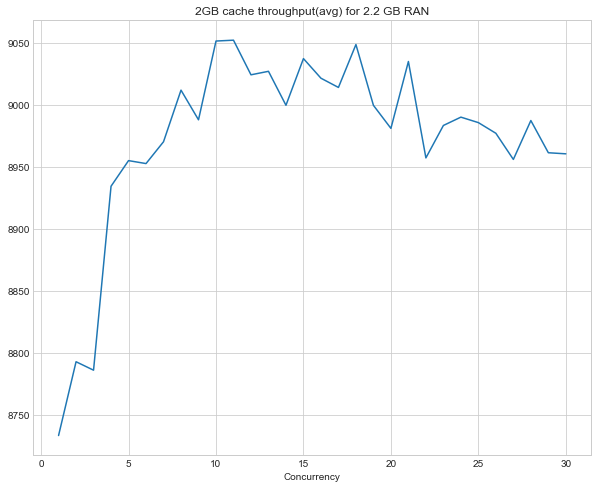

In [12]:
plt.title('2GB cache throughput(avg) for 2.2 GB RAN')
# y = parse_raw_data(raw_data, lambda i: i[0][0])
plt.xlabel('Concurrency')
# plt.ylabel('')
plt.plot(x, two_gb_throughput_avg)

In [13]:
cpuSteals_y = []
cpuSteals_x = []
for i in range(30):
    for j in raw_data[i]:
#         cpuSteals_y.append(float(j['cpuSteal']))
#         cpuSteals_y.append(float(j['cpuStealDelta']))
        cpuSteals_y.append(get_cpustealdelta_per_min(j))
        cpuSteals_x.append(i+1)

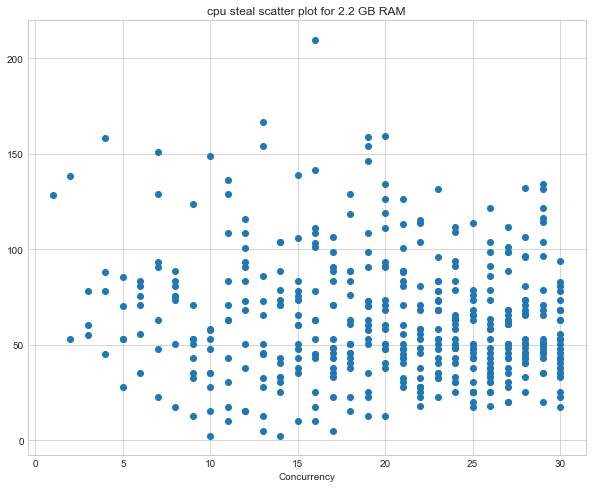

In [14]:
plt.title('cpu steal scatter plot for 2.2 GB RAM')
# y = parse_raw_data(raw_data, lambda i: i[0][0])
plt.xlabel('Concurrency')
plt.scatter(cpuSteals_x, cpuSteals_y)

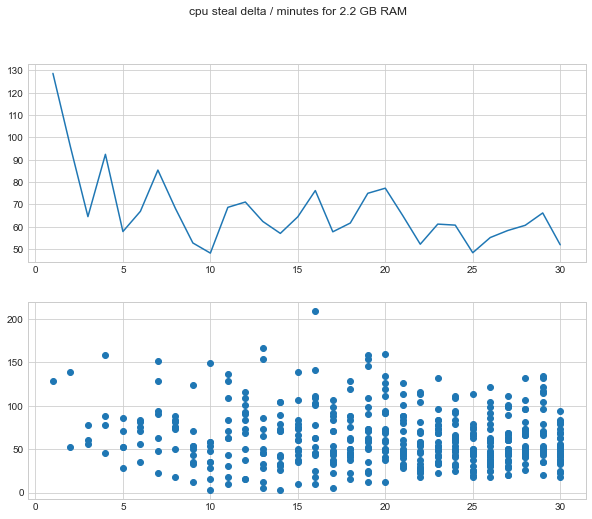

In [21]:
fig, axs = plt.subplots(2)
fig.suptitle('cpu steal delta / minutes for 2.2 GB RAM')
axs[0].plot(x, cpuSteals_avg)
axs[1].scatter(cpuSteals_x, cpuSteals_y)

In [16]:
len(raw_data)

30

In [17]:
float(raw_data[0][0]['runtime']) / 60000

3.9652

In [18]:
float(raw_data[0][0]['cpuStealDelta']) / (float(raw_data[0][0]['runtime']) / 60000)

128.6189851709876

In [19]:
def get_cpustealdelta_per_min(data):
    return float(data['cpuStealDelta']) / (float(data['runtime']) / 60000)

In [20]:
get_cpustealdelta_per_min(raw_data[10][0])

63.182369591589165